# Arbre de descision simple

In [102]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

path = '/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/TP2/spam7.csv'


In [70]:
df = pd.read_csv(path, sep=';')

#Attribution 0,1
df['yesno'] = df['yesno'].map({'y':1,'n':0})

X = df.drop(columns='yesno',axis=1)
Y = df['yesno']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [80]:
df

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,1
1,1028,0.180,0.372,0.43,0.43,0.21,1
2,2259,0.184,0.276,0.06,1.16,0.06,1
3,191,0.000,0.137,0.00,0.00,0.00,1
4,191,0.000,0.135,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,0
4597,14,0.000,0.353,0.00,0.00,0.00,0
4598,118,0.000,0.000,0.00,0.00,0.30,0
4599,78,0.000,0.000,0.00,0.00,0.96,0


In [71]:
#C
clf = DecisionTreeClassifier()

clf.fit(X_train, Y_train)


DecisionTreeClassifier()

In [72]:
print(clf.predict_proba(X_train)[1]) #[p0,p1] dans la feuille ou se situe l'individu 1 
clf.predict_proba(X_train).shape

[1. 0.]


(3680, 2)

In [73]:
#E
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)
print('accuracy_score(Y_train, Y_train_pred) =', accuracy_score(Y_train_pred, Y_train))
print('accuracy_score(Y_test, Y_test_pred) =', accuracy_score(Y_test_pred, Y_test))

accuracy_score(Y_train, Y_train_pred) = 0.9736413043478261
accuracy_score(Y_test, Y_test_pred) = 0.8479913137893594


[Text(0.7253338042940191, 0.9848484848484849, 'x[1] <= 0.056\ngini = 0.476\nsamples = 3680\nvalue = [2247, 1433]'),
 Text(0.5367764631778026, 0.9545454545454546, 'x[2] <= 0.087\ngini = 0.357\nsamples = 2799\nvalue = [2148, 651]'),
 Text(0.4057218946740455, 0.9242424242424242, 'x[3] <= 0.035\ngini = 0.176\nsamples = 1941\nvalue = [1752, 189]'),
 Text(0.33784508910438665, 0.8939393939393939, 'x[4] <= 0.26\ngini = 0.162\nsamples = 1898\nvalue = [1729, 169]'),
 Text(0.22743672573111293, 0.8636363636363636, 'x[0] <= 32.5\ngini = 0.156\nsamples = 1884\nvalue = [1723, 161]'),
 Text(0.05377741673436231, 0.8333333333333334, 'x[0] <= 15.5\ngini = 0.072\nsamples = 698\nvalue = [672, 26]'),
 Text(0.019821283509341998, 0.803030303030303, 'x[0] <= 2.5\ngini = 0.043\nsamples = 458\nvalue = [448, 10]'),
 Text(0.005199025182778229, 0.7727272727272727, 'x[0] <= 1.5\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.0025995125913891143, 0.7424242424242424, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),

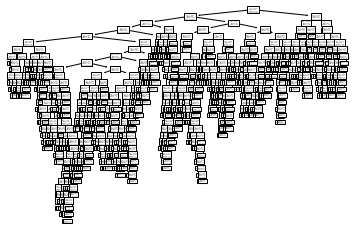

In [74]:
#F
import sklearn 
sklearn.tree.plot_tree(clf)

In [103]:
#G
from sklearn.model_selection import GridSearchCV

parm_grid = {'max_depth':[3,5,7,10,15,20],
             'min_samples_leaf':[2,3,5,10],
             'ccp_alpha': [0,0.2,0.4,0.6,0.1],
             'criterion': ["gini", 'entropy', "log_loss"]
            }

Grid = GridSearchCV(DecisionTreeClassifier(), parm_grid,cv=5)
Grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0, 0.2, 0.4, 0.6, 0.1],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 10, 15, 20],
                         'min_samples_leaf': [2, 3, 5, 10]})

In [104]:
Grid.best_params_

{'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 10}

In [105]:
#H
Model_best = Grid.best_estimator_
print('Score train', Model_best.score(X_train,Y_train))
print('Score test', Model_best.score(X_test,Y_test))

Score train 0.8926630434782609
Score test 0.8653637350705755


[Text(0.6, 0.8333333333333334, 'x[1] <= 0.056\nentropy = 0.964\nsamples = 3680\nvalue = [2247, 1433]'),
 Text(0.4, 0.5, 'x[2] <= 0.087\nentropy = 0.782\nsamples = 2799\nvalue = [2148, 651]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.461\nsamples = 1941\nvalue = [1752, 189]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.996\nsamples = 858\nvalue = [396, 462]'),
 Text(0.8, 0.5, 'entropy = 0.507\nsamples = 881\nvalue = [99, 782]')]

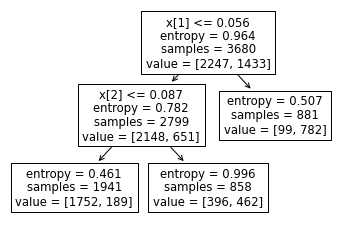

In [84]:
sklearn.tree.plot_tree(Model_best)

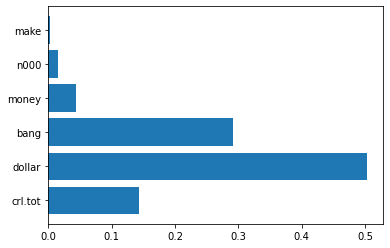

In [106]:
#I


imp = Model_best.feature_importances_ #On trouve que les deux premières variables sont les plus importantes
feat = list(X_train.columns)

p = plt.barh(feat,imp)


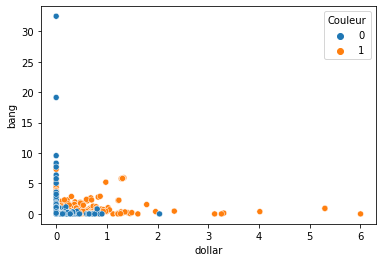

In [107]:

import seaborn as sns


sns.scatterplot(x='dollar', y='bang', hue='yesno', data=df)

# Facultatif : pour ajouter une légende
plt.legend(title='Couleur')

# Affichez le plot
plt.show()

# Bagging

In [111]:
from sklearn.ensemble import BaggingClassifier


# Créez un modèle de base, par exemple, un classificateur d'arbre de décision
base_model = DecisionTreeClassifier()

# Créez un modèle BaggingClassifier
bagging_model = BaggingClassifier(base_model, n_estimators=100, random_state=42)

# Entraînez le modèle Bagging sur X_train
bagging_model.fit(X_train, Y_train)

# Pour faire des prédictions sur de nouvelles données X_test
Y_pred = bagging_model.predict(X_test)

# Évaluez les performances du modèle
accuracy = accuracy_score(Y_test, Y_pred)

print('accuracy',accuracy)

accuracy 0.8610206297502715


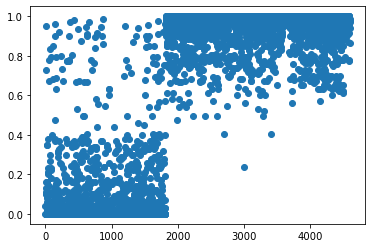

In [130]:
P0 = bagging_model.predict_proba(X_train)[:,0]
plt.scatter(X_train.index,P0 )